# **Task 01: Customer Retention Prediction**

**Build a complete machine learning pipeline that predicts whether a customer will turnover based on their previous data.**

### **Setup and Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

### **Load dataset**

In [ ]:
df = pd.read_csv('/content/DataML.csv')
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


## **Data Inspection**

In [ ]:
# Check Data shape
print("Shape:", df.shape)
# Check Data Types
print("\nData Types:\n", df.dtypes)
# Check Null Values
print("\nMissing Values:\n", df.isnull().sum())
# Check Duplicate Row
print("\nDuplicate Rows:", df.duplicated().sum())
# Data Description
print("\nSummary Statistics:\n", df.describe())
# Check class balance
print("\nTarget_Churn value counts:\n", df['Target_Churn'].value_counts())

Shape: (1000, 15)

Data Types:
 Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

Missing Values:
 Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_

## **Univariate Analysis - Numerical**

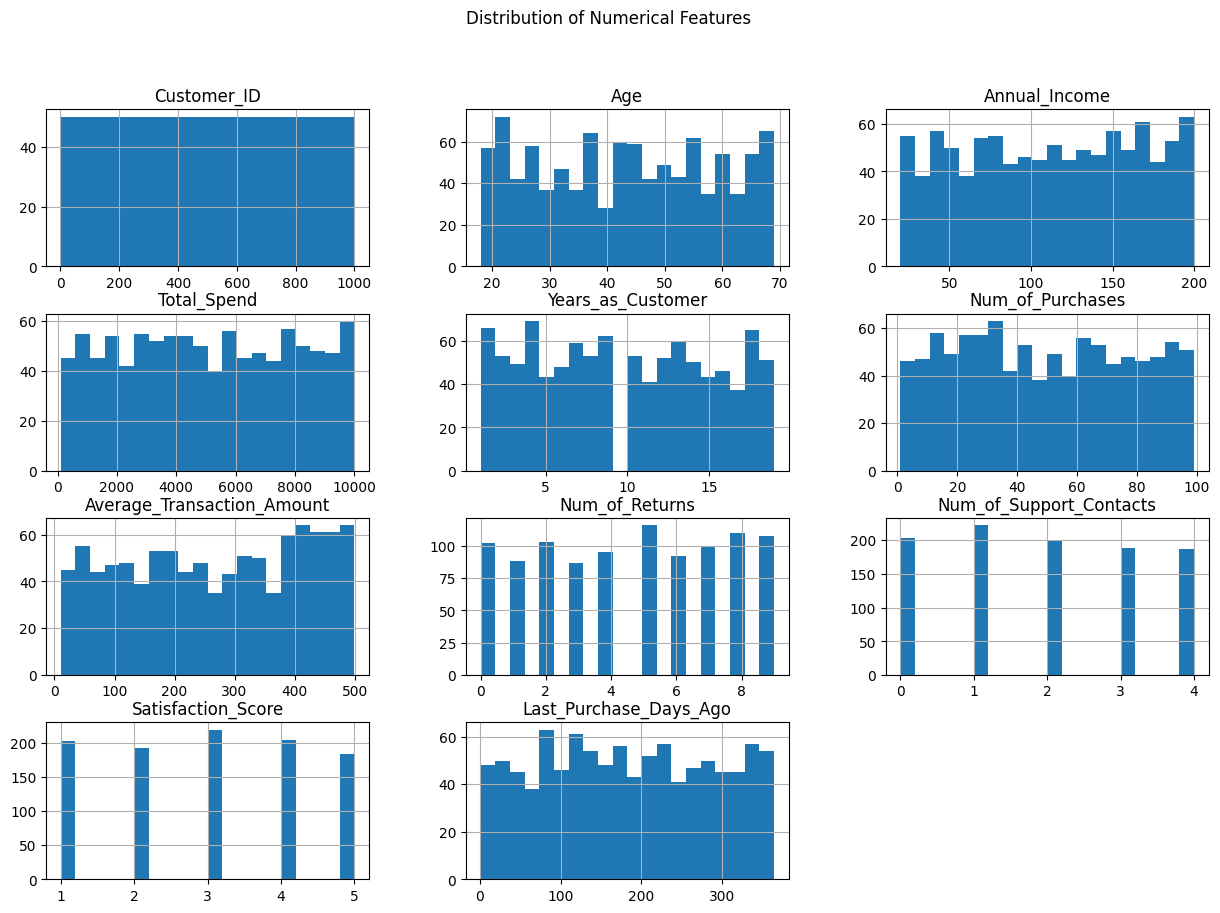

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for all numeric columns
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()


## **Univariate Analysis - Categorical**

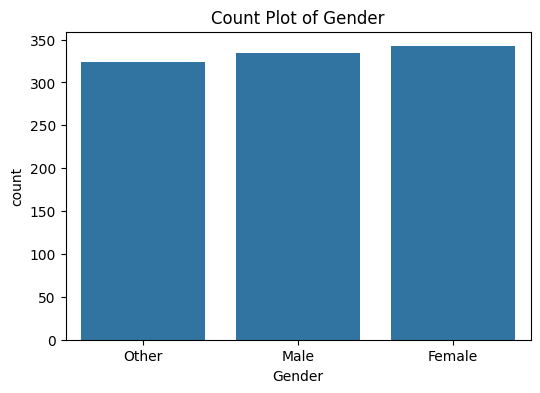

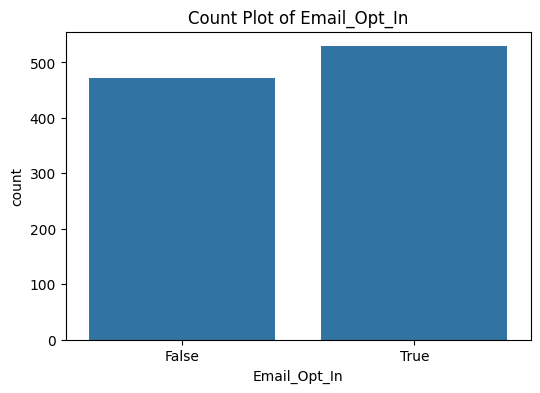

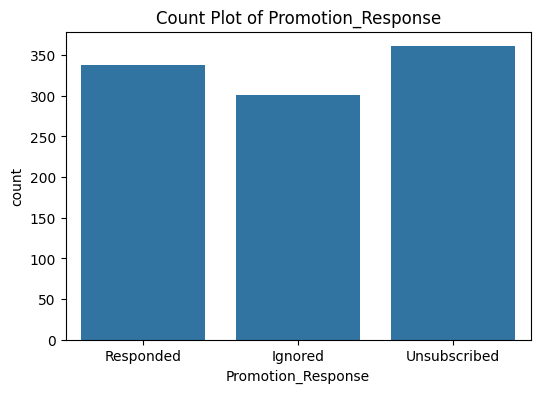

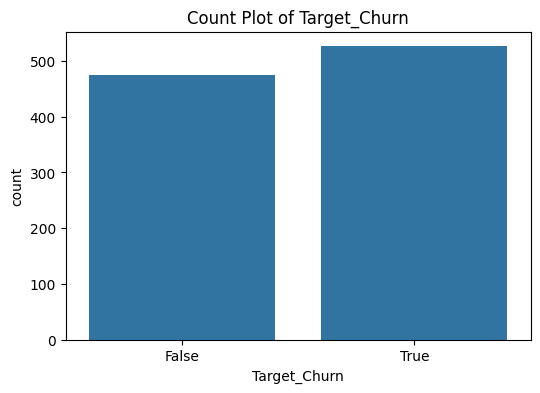

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in cat_cols:
  plt.figure(figsize=(6, 4))
  sns.countplot(data=df, x=col)
  plt.title(f'Count Plot of {col}')
  plt.show()

## **Bivariate Analysis - Numerical vs Target**

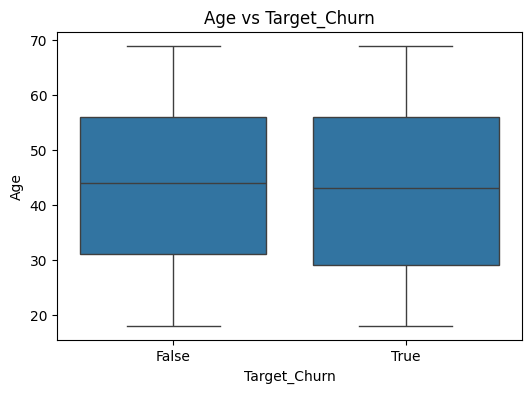

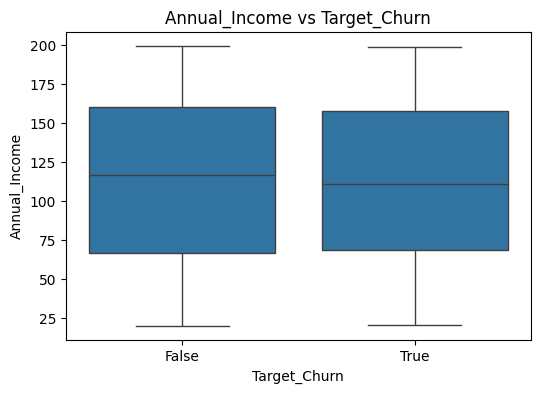

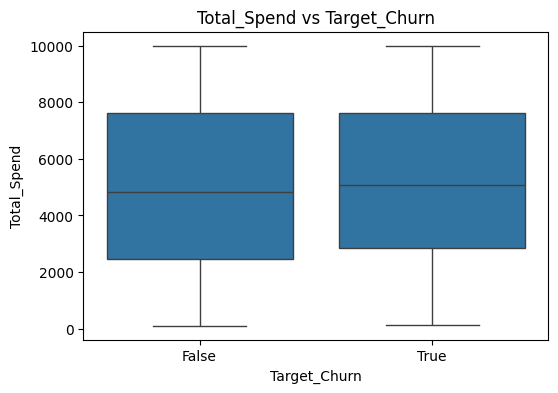

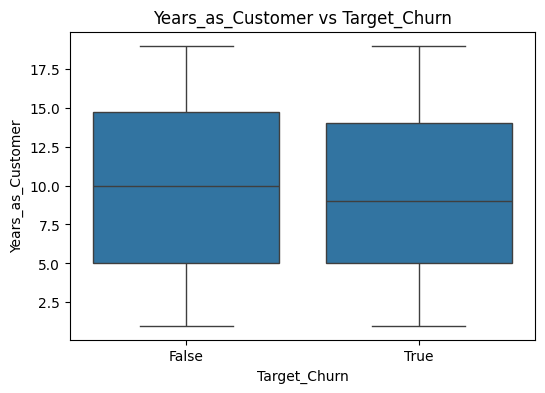

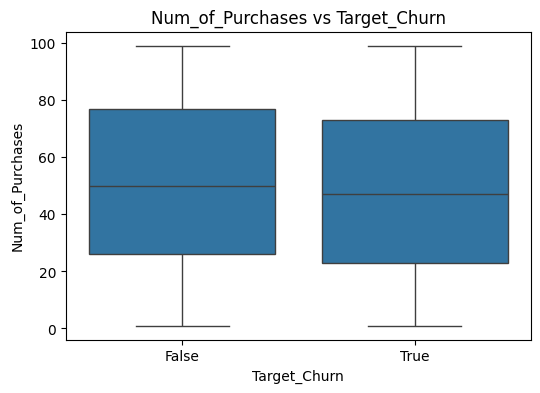

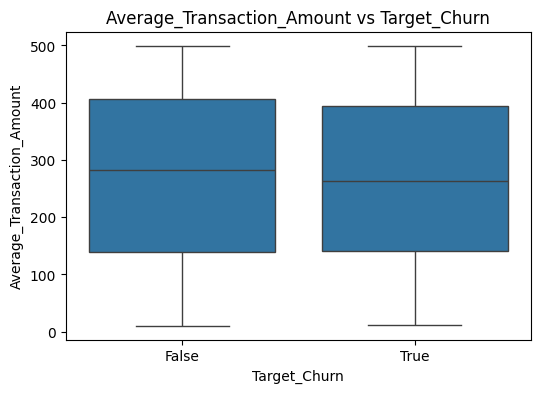

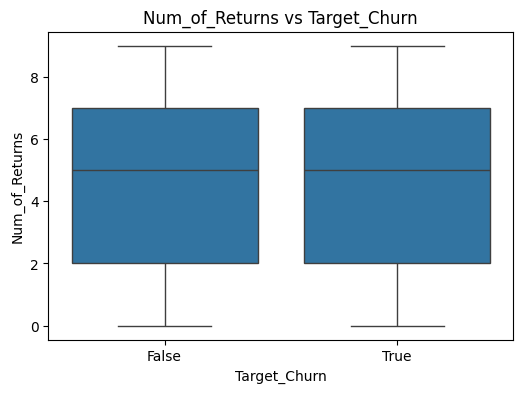

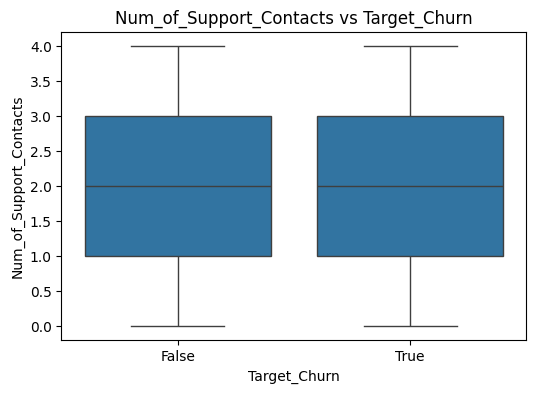

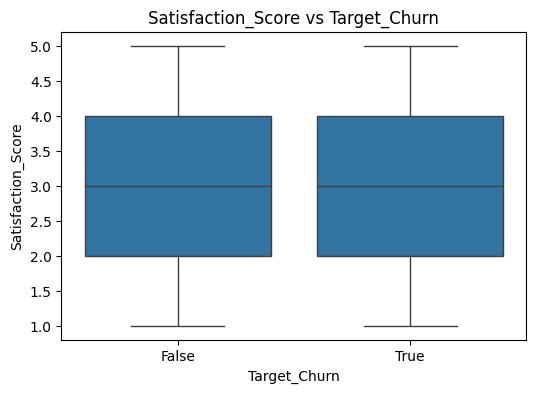

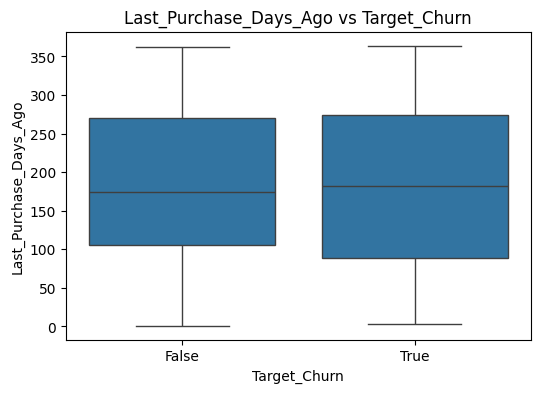

In [ ]:
target = 'Target_Churn'
for col in num_cols:
  if col != 'Customer_ID':
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f'{col} vs {target}')
    plt.show()

## **Bivariate Analysis - Categorical vs Target**

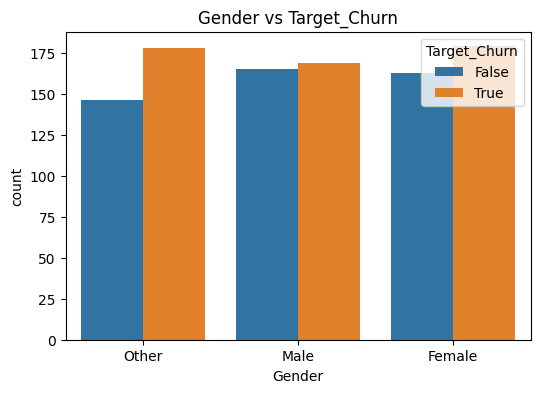

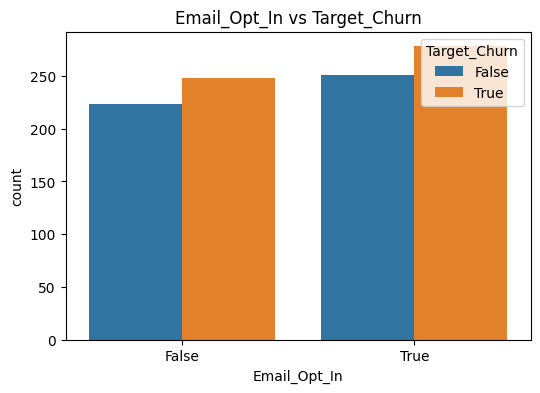

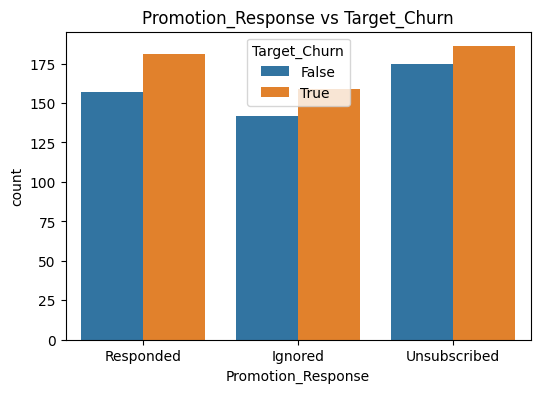

In [ ]:
for col in cat_cols:
  if col != target:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f'{col} vs {target}')
    plt.show()

## **Correlation Analysis**

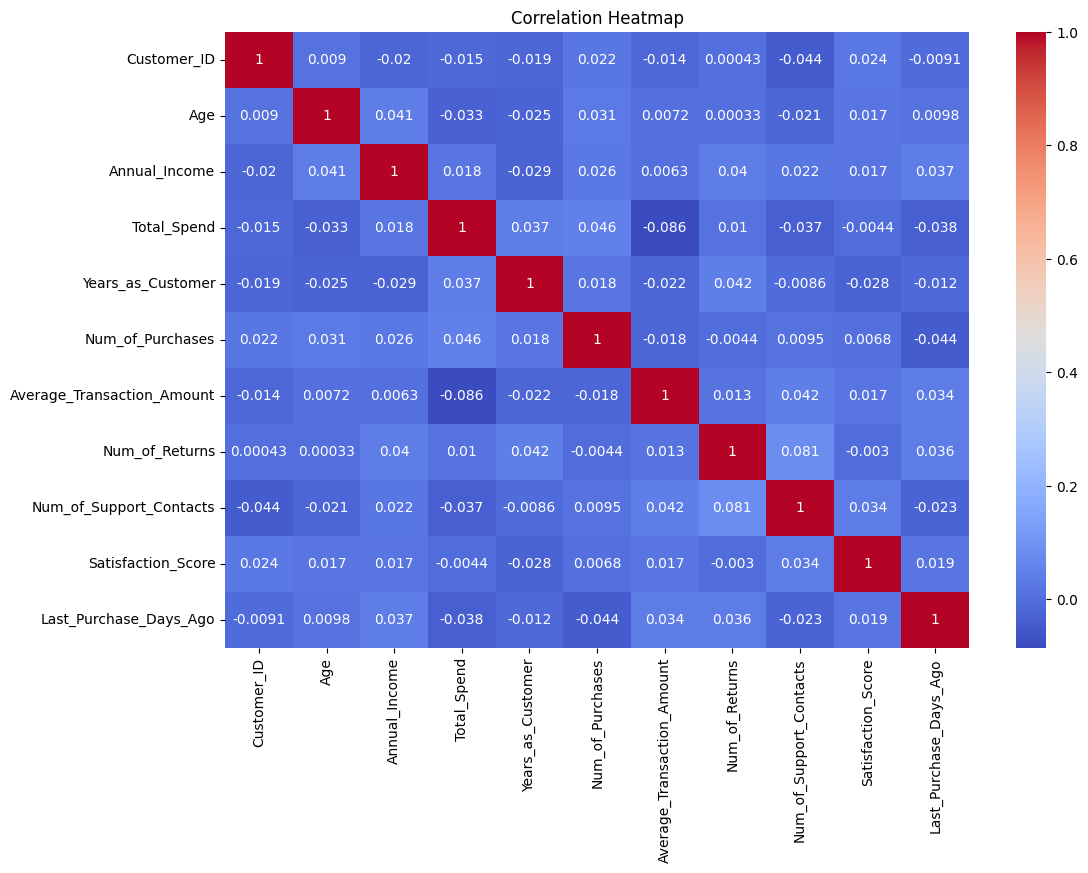

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Feature Engineering**

In [ ]:
# New Feature Spend per year
df['Spend_per_Year'] = df['Total_Spend'] / (df['Years_as_Customer'] + 1)
# New Feature Return Rate
df['Return_Rate'] = df['Num_of_Returns'] / (df['Num_of_Purchases'] + 1)
# Support to Purchase Ratio
df['Support_to_Purchase_Ratio'] = df['Num_of_Support_Contacts'] / (df['Num_of_Purchases'] + 1)
#print those features
print("New Features Added: ['Spend_per_Year', 'Return_Rate', 'Support_to_Purchase_Ratio']")
df[['Spend_per_Year', 'Return_Rate', 'Support_to_Purchase_Ratio']].head()

New Features Added: ['Spend_per_Year', 'Return_Rate', 'Support_to_Purchase_Ratio']


,Spend_per_Year,Return_Rate,Support_to_Purchase_Ratio
0,1.946845,-23.978614,-36.666249
1,0.866441,-0.458983,0.023951
2,-0.980062,0.076349,0.026821
3,-6.531189,0.316654,1.796675
4,0.055505,-0.719577,-1.782903


## **Data Cleaning and Encoding**

In [ ]:
# Drop irrelevant column
df = df.drop(columns=['Customer_ID'])

# Encode categorical variables
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Promotion_Response'] = le.fit_transform(df['Promotion_Response'])

# Convert boolean columns to int
df['Email_Opt_In'] = df['Email_Opt_In'].astype(int)
df['Target_Churn'] = df['Target_Churn'].astype(int)

# Check results
df.head()


,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Spend_per_Year,Return_Rate,Support_to_Purchase_Ratio
0,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,1,982.096667,0.086957,0.000000
1,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,0,1,0,644.676429,0.025641,0.025641
2,18,1,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1,44.202143,0.069444,0.027778
3,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,1,2277.575000,0.147059,0.088235
4,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0,336.930000,0.068182,0.000000


In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Select numeric columns (excluding target)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Target_Churn', errors='ignore')

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Numerical features scaled successfully.")

Numerical features scaled successfully.


## **Final Processed Data Overview**

In [ ]:
print("Final Columns:\n", df.columns.tolist())
df.head()

Final Columns:
 ['Age', 'Gender', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response', 'Target_Churn', 'Spend_per_Year', 'Return_Rate', 'Support_to_Purchase_Ratio']


,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Spend_per_Year,Return_Rate,Support_to_Purchase_Ratio
0,1.229628,1.247718,-1.264973,0.283773,-0.854240,-0.962378,1.282050,-0.902114,-1.379444,0.018689,-0.516489,0.943588,-0.073945,1,0.350283,-0.286472,-0.500084
1,1.426547,0.022062,-0.614434,1.378924,0.591480,0.965463,-1.673359,-0.902114,0.047075,0.018689,0.422756,-1.059784,-0.073945,0,-0.083113,-0.449708,-0.340312
2,-1.658518,0.022062,-1.567145,-1.559749,0.591480,0.755153,-1.483853,0.134005,0.047075,-0.700136,0.959468,-1.059784,-0.073945,1,-0.854385,-0.333093,-0.326997
3,-1.461599,1.247718,-0.612162,1.408578,-1.215669,-0.576810,0.994191,0.134005,0.760335,1.456339,0.413172,0.943588,-1.306354,1,2.014245,-0.126466,0.049722
4,-1.461599,1.247718,-0.649460,0.108396,0.952910,-0.226294,-1.136392,-0.556741,-1.379444,1.456339,0.566518,-1.059784,1.158465,0,-0.478394,-0.336455,-0.500084


## **Train-Test Split**

In [ ]:
X = df.drop('Target_Churn', axis=1)
y = df['Target_Churn']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)


### **Handle class imbalance using SMOTE**

In [ ]:
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

## **Model Training**

In [ ]:
# ---- Random Forest ----
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:,1]

# ---- XGBoost ----
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_val)
y_prob_xgb = xgb_model.predict_proba(X_val)[:,1]

# ---- LightGBM ----
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    num_leaves=31,
    max_depth=6,
    learning_rate=0.05,
    min_child_samples=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(X_train_res, y_train_res)
y_pred_lgb = lgb_model.predict(X_val)
y_prob_lgb = lgb_model.predict_proba(X_val)[:,1]


[LightGBM] [Info] Number of positive: 294, number of negative: 294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1614
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

### **ANN**

In [ ]:
ann = Sequential()
ann.add(Dense(128, input_dim=X_train_res.shape[1], activation='relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.3))
ann.add(Dense(64, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.2))
ann.add(Dense(1, activation='sigmoid'))
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ann.fit(X_train_res, y_train_res, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

y_prob_ann = ann.predict(X_val).ravel()
y_pred_ann = (y_prob_ann >= 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


## **Performance Evaluation**

In [ ]:
def evaluate_model(y_true, y_pred, y_prob=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None
    return acc, prec, rec, f1, roc_auc

metrics = {
    "RandomForest": evaluate_model(y_val, y_pred_rf, y_prob_rf),
    "XGBoost": evaluate_model(y_val, y_pred_xgb, y_prob_xgb),
    "LightGBM": evaluate_model(y_val, y_pred_lgb, y_prob_lgb),
    "ANN": evaluate_model(y_val, y_pred_ann, y_prob_ann)
}


In [ ]:
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
metrics_df

,RandomForest,XGBoost,LightGBM,ANN
Accuracy,0.527778,0.511111,0.511111,0.611111
Precision,0.551020,0.535354,0.543210,0.589928
Recall,0.568421,0.557895,0.463158,0.863158
F1-Score,0.559585,0.546392,0.500000,0.700855
ROC-AUC,0.531146,0.521734,0.522477,0.629598


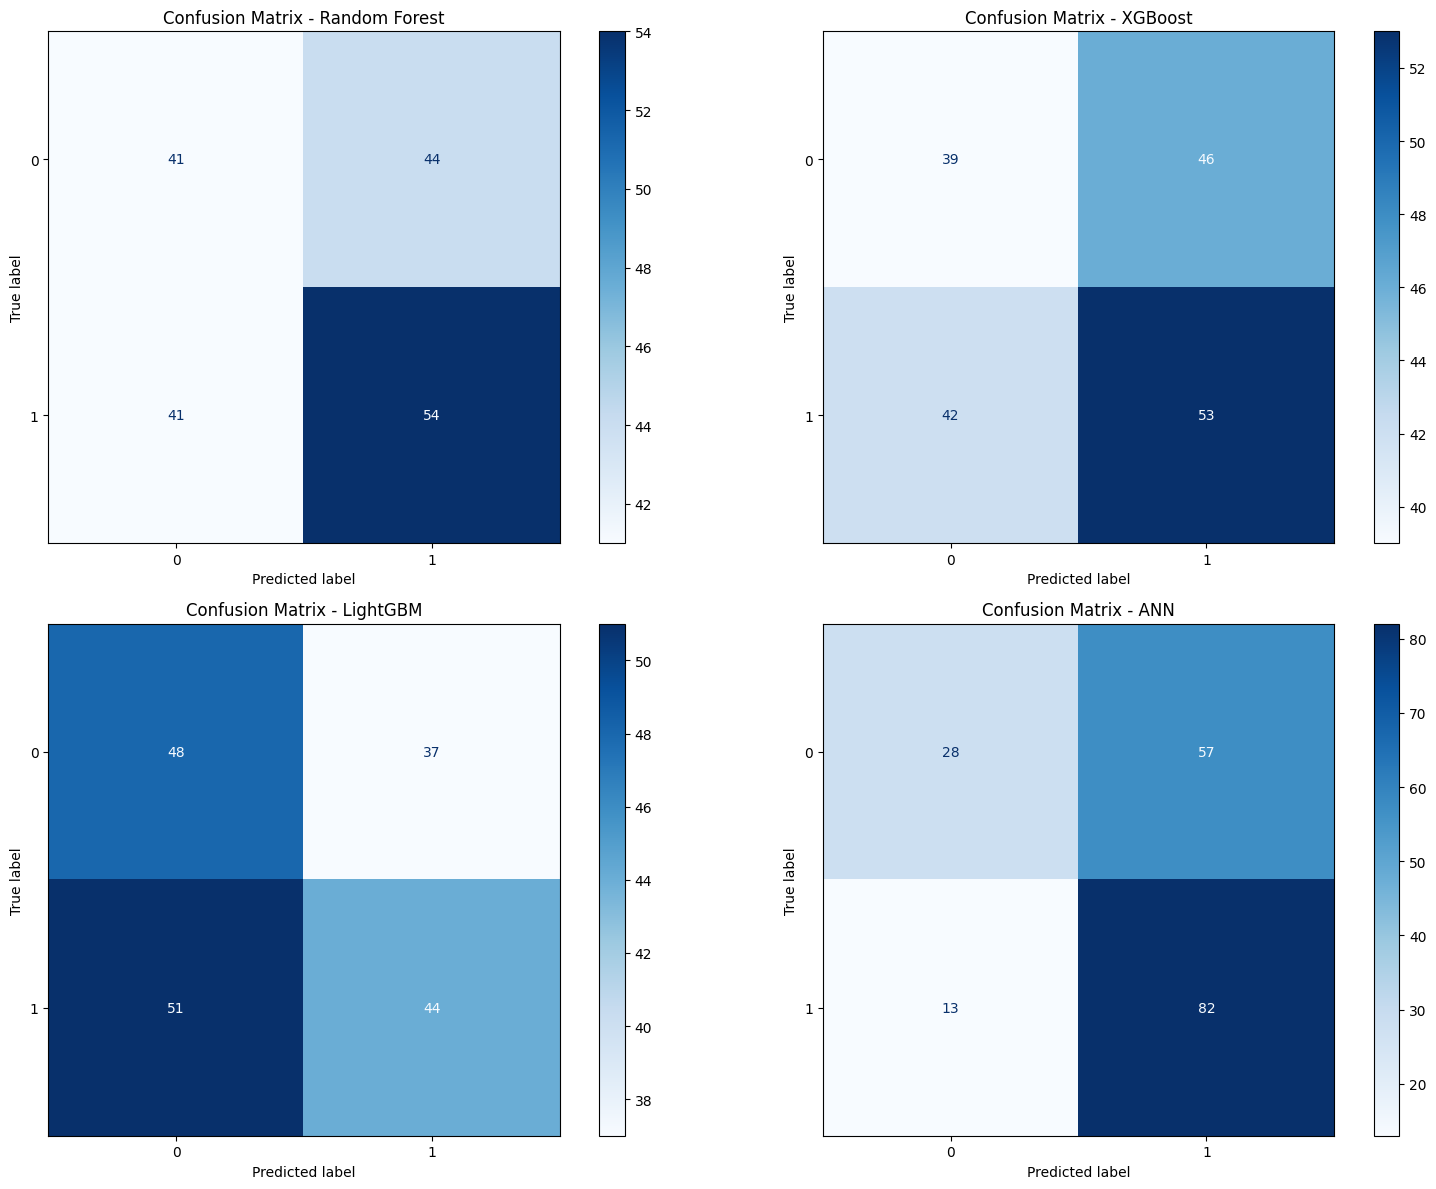

In [ ]:
# Confusion Matrices for All Models
models = {
    "Random Forest": (y_val, y_pred_rf),
    "XGBoost": (y_val, y_pred_xgb),
    "LightGBM": (y_val, y_pred_lgb),
    "ANN": (y_val, y_pred_ann)
}

plt.figure(figsize=(16,12))

for i, (name, (y_true, y_pred)) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()


## Summary of Key Findings

**Best Model:**  
- **ANN** is the most effective, achieving **high recall (0.86)** and **F1-score (0.70)**, meaning it correctly identifies most churned customers.

**Other Models:**  
- RandomForest, XGBoost, and LightGBM have lower accuracy (~51–53%) and miss a significant number of churned customers.

**Key Features Influencing Churn:**  
- **Tenure, Balance, NumOfProducts, Balance_per_Product**

**Recommendation:**  
- Deploy **ANN** for churn prediction.  
- Further improvements can be made by **collecting more data** and **engineering additional behavioral features**.

**For this dataset, catching churned customers is more important than minimizing false positives, so ANN is the preferred model. Tree-based models can serve as a secondary model or for feature importance analysis.**